In [1]:
import requests
import pandas as pd
import io
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON

df = pd.read_csv("Resources/Florida_COVID19_Case_Line_Data_new.csv")

df.head(3)

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 01:04:23+00,2020/07/15 05:00:00+00,90
1,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 19:56:31+00,2020/07/15 05:00:00+00,279
2,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 15:03:33+00,2020/07/15 05:00:00+00,339


In [2]:
#Clean dataframe

new_csv_data_df = df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Case1"]]
new_csv_data_df.head()

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Case1
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,NO,2020/07/15 05:00:00+00


In [3]:
#Split Date and time into separate columns
#new_csv_data_df['new_timestamp'] = pd.to_datetime("Case1")

new_csv_data_df['Date'] = pd.to_datetime(new_csv_data_df['Case1']).dt.date
new_csv_data_df['Time'] = pd.to_datetime(new_csv_data_df['Case1']).dt.time


#new_csv_data_df['month_day'] = pd.to_datetime(new_csv_data_df['Case1']).dt.to_period('')

#new_csv_data_df['Date'] = [d.date() for d in new_csv_data_df['Case1']]
#new_csv_data_df['Time'] = [d.time() for d in new_csv_data_df['Case1']]
new_csv_data_df

#new_data_df = new_csv_data_df.assign(Date=new_csv_data_df.new_timestamp.dt.date, Time=new_csv_data_df.new_timestamp.dt.time)
#new_data_df


C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Case1,Date,Time
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00,2020-07-15,05:00:00
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00,2020-07-15,05:00:00
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,2020/07/15 05:00:00+00,2020-07-15,05:00:00
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00,2020-07-15,05:00:00
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,NO,2020/07/15 05:00:00+00,2020-07-15,05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
315770,11869,Palm Beach,71.0,65-74 years,Female,Not diagnosed/isolated in FL,Yes,NO,2020/03/04 05:00:00+00,2020-03-04,05:00:00
315771,11740,Gadsden,54.0,45-54 years,Male,Not diagnosed/isolated in FL,Yes,UNKNOWN,2020/03/03 05:00:00+00,2020-03-03,05:00:00
315772,11747,Hillsborough,22.0,15-24 years,Female,Non-FL resident,Yes,NO,2020/03/03 05:00:00+00,2020-03-03,05:00:00
315773,11881,Hillsborough,29.0,25-34 years,Female,FL resident,Yes,NO,2020/03/02 05:00:00+00,2020-03-02,05:00:00


In [4]:
new_csv_data_df.dtypes


ObjectId            int64
County             object
Age               float64
Age_group          object
Gender             object
Jurisdiction       object
Travel_related     object
Hospitalized       object
Case1              object
Date               object
Time               object
dtype: object

In [5]:
#Create new csv

new_csv_data_df.to_csv ("new_covid_dataframe.csv")

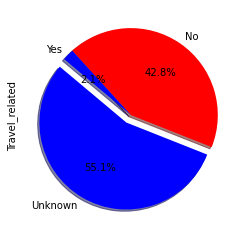

In [6]:
#Compare travel-related cases to non-travel-related cases (Not done yet) (Chika)
travel_vs_nontravel = new_csv_data_df["Travel_related"].value_counts()
#travel_vs_nontravel

colors = ['blue', 'red']
explode = (0.1, 0, 0)
travel_vs_nontravel.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.show()


In [7]:
hosp_filter = new_csv_data_df["Hospitalized"] == "YES"
hosp_filter_df = new_csv_data_df[hosp_filter]
hosp_filter_df

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Case1,Date,Time
11,12600,Broward,59.0,55-64 years,Female,FL resident,No,YES,2020/07/15 05:00:00+00,2020-07-15,05:00:00
13,13705,Escambia,60.0,55-64 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00,2020-07-15,05:00:00
144,33647,Putnam,66.0,65-74 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00,2020-07-15,05:00:00
215,44046,Dade,43.0,35-44 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00,2020-07-15,05:00:00
354,56860,Volusia,66.0,65-74 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00,2020-07-15,05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
315764,11932,Lee,77.0,75-84 years,Male,FL resident,Yes,YES,2020/03/07 05:00:00+00,2020-03-07,05:00:00
315765,11933,Broward,65.0,65-74 years,Male,FL resident,Yes,YES,2020/03/07 05:00:00+00,2020-03-07,05:00:00
315766,11936,Santa Rosa,71.0,65-74 years,Male,FL resident,Yes,YES,2020/03/05 05:00:00+00,2020-03-05,05:00:00
315767,11601,Leon,59.0,55-64 years,Female,Not diagnosed/isolated in FL,Yes,YES,2020/03/04 05:00:00+00,2020-03-04,05:00:00


In [8]:
#Average age of patients hospitalized 
Average_age_hospitalized = hosp_filter_df.groupby("Hospitalized").Age.mean() 
Average_age_hospitalized


Hospitalized
YES    62.592686
Name: Age, dtype: float64

In [9]:
#Calucalate percentage hospitalized by age group 
#Calculate total hospitalized 
Total_hospitalized = hosp_filter_df["Hospitalized"].count()

#Group by age group and count total hospitalized by age category
demo_age_grouped = hosp_filter_df.groupby("Age_group")
total_hospitalize_count = demo_age_grouped["Hospitalized"].value_counts()

#Calculate percentage by age category
age_percentage = (total_hospitalize_count/Total_hospitalized) * 100

#Create a dataframe for values
Age_demographic_summary = pd.DataFrame({"Total Count": total_hospitalize_count, 
                                          "Percentage of hospitalized patients": age_percentage})
#Remove index name
#Age_demographic_summary.index.name =None

#Format percentage to two decimal places 
Age_demographic_summary["Percentage of hospitalized patients"] = Age_demographic_summary["Percentage of hospitalized patients"].map("{0:,.3}%".format)
Age_demographic_summary



,,Total Count,Percentage of hospitalized patients
Age_group,Hospitalized,,
0-4 years,YES,98,0.486%
15-24 years,YES,497,2.47%
25-34 years,YES,1259,6.25%
35-44 years,YES,1876,9.31%
45-54 years,YES,2696,13.4%
5-14 years,YES,74,0.367%
55-64 years,YES,3544,17.6%
65-74 years,YES,3871,19.2%
75-84 years,YES,3558,17.7%


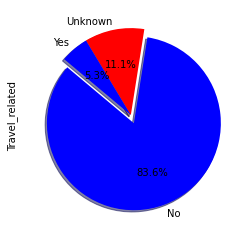

In [10]:
#Compare travel-related hospitalization to non-travel-related hospitalization (Not done yet) (Chika)
travel_vs_nontravel_hosp = hosp_filter_df["Travel_related"].value_counts()

#Plottravel_vs_nontravel

colors = ['blue', 'red']
explode = (0.1, 0, 0)
travel_vs_nontravel_hosp.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.show()

In [11]:
#hosp_filter_df['new_timestamp'] = pd.to_datetime(hosp_filter_df.Case1.iat[0])

In [20]:
#Split case date into date and time

#new_hosp_data_df = hosp_filter_df.assign(Date=hosp_filter_df.new_timestamp.dt.date, Time=hosp_filter_df.new_timestamp.dt.time)

#Create new dataframe for date and hospilization
sec_hosp_data_df = hosp_filter_df.filter(["County",'Hospitalized', "Age", "Age_group", "Gender", 'Date'], axis=1)
sec_hosp_data_df


,County,Hospitalized,Age,Age_group,Gender,Date
11,Broward,YES,59.0,55-64 years,Female,2020-07-15
13,Escambia,YES,60.0,55-64 years,Male,2020-07-15
144,Putnam,YES,66.0,65-74 years,Male,2020-07-15
215,Dade,YES,43.0,35-44 years,Male,2020-07-15
354,Volusia,YES,66.0,65-74 years,Male,2020-07-15
...,...,...,...,...,...,...
315764,Lee,YES,77.0,75-84 years,Male,2020-03-07
315765,Broward,YES,65.0,65-74 years,Male,2020-03-07
315766,Santa Rosa,YES,71.0,65-74 years,Male,2020-03-05
315767,Leon,YES,59.0,55-64 years,Female,2020-03-04


In [27]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

Before_start_date = "2020-01-01"
Before_end_date = '2020-05-03'

mask = (sec_hosp_data_df['Date'] > Before_start_date) & (sec_hosp_data_df['Date'] <= Before_end_date)

hosp_filter_df_new = sec_hosp_data_df.loc[mask]
hosp_filter_df_new

,County,Hospitalized,Age,Age_group,Gender,Date
279167,Hillsborough,YES,75.0,75-84 years,Female,2020-05-03
279168,Polk,YES,74.0,65-74 years,Male,2020-05-03
279171,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03
279172,Dade,YES,87.0,85+ years,Male,2020-05-03
279173,Broward,YES,69.0,65-74 years,Male,2020-05-03
...,...,...,...,...,...,...
315764,Lee,YES,77.0,75-84 years,Male,2020-03-07
315765,Broward,YES,65.0,65-74 years,Male,2020-03-07
315766,Santa Rosa,YES,71.0,65-74 years,Male,2020-03-05
315767,Leon,YES,59.0,55-64 years,Female,2020-03-04


In [28]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m-%d")
hosp_filter_df_new

C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KAKA\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,Hospitalized,Age,Age_group,Gender,Date,Case_Date
279167,Hillsborough,YES,75.0,75-84 years,Female,2020-05-03,05-03
279168,Polk,YES,74.0,65-74 years,Male,2020-05-03,05-03
279171,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03,05-03
279172,Dade,YES,87.0,85+ years,Male,2020-05-03,05-03
279173,Broward,YES,69.0,65-74 years,Male,2020-05-03,05-03
...,...,...,...,...,...,...,...
315764,Lee,YES,77.0,75-84 years,Male,2020-03-07,03-07
315765,Broward,YES,65.0,65-74 years,Male,2020-03-07,03-07
315766,Santa Rosa,YES,71.0,65-74 years,Male,2020-03-05,03-05
315767,Leon,YES,59.0,55-64 years,Female,2020-03-04,03-04


In [29]:
Total_hospitalized_date = hosp_filter_df_new["Hospitalized"].count()

#Group by age group and count total hospitalized by age category
new_demo_age_grouped = hosp_filter_df_new.groupby("Case_Date")
new_total_hospitalize_count1 = new_demo_age_grouped["Hospitalized"].value_counts()

#Calculate percentage by age category
#age_percentage = (new_total_hospitalize_count1/Total_hospitalized_date) * 100

#Create a dataframe for values
new_Age_demographic_summary = pd.DataFrame({"Total Count": new_total_hospitalize_count1}) 
                                          #"Percentage of hospitalized patients": age_percentage})
#Remove index name
#Age_demographic_summary.index.name =None

#Format percentage to two decimal places 
#Age_demographic_summary["Percentage of hospitalized patients"] = Age_demographic_summary["Percentage of hospitalized patients"].map("{0:,.3}%".format)
#new_Age_demographic_summary


In [18]:
#Filter data for after reopening

after_start_date = "2020-05-04"
after_end_date = '2020-07-15'

mask = (sec_hosp_data_df['Date'] > after_start_date) & (sec_hosp_data_df['Date'] <= after_end_date)

hosp_filter_df_new = sec_hosp_data_df.loc[mask]
hosp_filter_df_new


,Hospitalized,Date
11,YES,2020-07-15
13,YES,2020-07-15
144,YES,2020-07-15
215,YES,2020-07-15
354,YES,2020-07-15
...,...,...
278541,YES,2020-05-05
278542,YES,2020-05-05
278545,YES,2020-05-05
278573,YES,2020-05-05


In [ ]:
#Average age of patients hospitalized before shut down

In [ ]:
#Average age of patients hospitalized after reopening